# Student Success Classification

This notebook is intended to be a place where our team experiments, works with, and models the data. Our goal is to classify the status of students between 3 distinct classes:
1. Drop out
2. Graduated
3. Enrolled

There are 36 features to predict this including demographic information, academic information, financial information, and a few economic indicators.

## Importing the data

In [2]:
%%bash
ls data

metadata.csv
student-dropout-academic-success.csv


In [3]:
import pandas as pd

# importing data and insuring columns were read in correctly
raw_data = pd.read_csv("data/student-dropout-academic-success.csv", delimiter=";")
raw_data.columns = raw_data.columns.str.strip()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## Brief Look at the Data

In [4]:
# looking at target column
raw_data.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [5]:
raw_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Looking column by column

In [6]:
df = raw_data.copy()  # copying data to create a working copy
df.columns = df.columns.str.replace(" ", "_").str.lower()

### Marital Status

In [7]:
df.marital_status.value_counts().sort_index()

marital_status
1    3919
2     379
3       4
4      91
5      25
6       6
Name: count, dtype: int64

1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated

We need to convert this ordinal column back to strings then we will one hot encode it.

In [9]:
grouped_marital_status = df.marital_status.map(
    {1: "single", 2: "married", 3: "widower", 4: "divorced", 5: "facto_union", 6: "legally_separated"}
).value_counts()
grouped_marital_status

marital_status
single               3919
married               379
divorced               91
facto_union            25
legally_separated       6
widower                 4
Name: count, dtype: int64

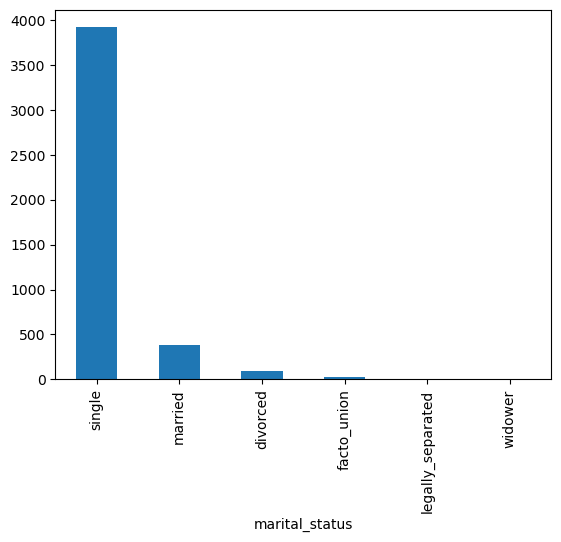

In [11]:
grouped_marital_status.plot(kind="bar");